In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from methods.helper import pareto_scaling
import random
random.seed(42)

In [4]:
# Read the PSG data
PSG_path = "C:/Users/mjgoj/Desktop/THESIS/data/PSG_combined_data_corrected.tsv"
PSG = pd.read_csv(PSG_path, sep='\t')
PSG.head()

,Unnamed: 0,AD_2013_Lambert.x,AD_2013_Lambert.y,AD_2022_Bellenguez.PRS.auto.csv,Adiponectin_2012_Dastani,ADwoAPOE_2019_Kunkle,ASD_2019_Grove,BD_2021_Mullins,BL_2014_Valk,BMI_2018_Yengo,...,RA_2014_Okada,SBPauto_2018_UKBB,SBPmanual_2018_UKBB,SHR_2015_Chan,SleepDuration_2019_Dashti,T2D_2012_DIAGRAM,TC_2010_GLG,TG_2010_GLG,WC_2015_Shugin,WHR_2015_Shugin
0,002_S_0295,1.020979,1.036873,-0.259994,-0.186889,0.026476,0.949902,4.279790,-0.182475,0.054470,...,2.368773,-0.522596,-0.073559,-0.003614,0.137212,3.800876,0.326984,-5.060339,0.528599,0.509296
1,002_S_0413,0.181993,0.196371,-0.040532,-0.470822,0.103363,1.739373,4.771778,0.092721,0.037042,...,1.247046,0.063787,0.157128,0.016120,0.172982,1.937300,0.413183,-1.628441,0.462549,-0.077467
2,002_S_0559,0.232268,0.246854,-1.225692,-0.383872,-0.187869,1.091953,4.012802,-0.287020,-0.236638,...,2.201941,-0.489702,-0.092055,0.087422,-0.355400,0.589977,-0.352274,-4.531156,0.362273,0.261168
3,002_S_0619,1.964580,1.976103,1.257457,-0.045276,0.442142,1.588555,5.074999,-0.232651,-0.243020,...,2.931610,-0.281150,-0.165665,-0.299536,-0.236212,1.806653,-0.351126,-5.432477,0.150199,0.005890
4,002_S_0685,1.083671,1.103491,0.390164,-1.023179,0.195821,1.734625,4.639600,-0.068566,0.606557,...,3.407141,-0.307525,-0.178034,-0.026270,0.017931,2.005372,-1.039832,-6.185205,0.332348,0.046803


In [5]:
print(PSG.shape)

(1410, 49)


### Filtering the PSG data
First, the data needs to be filtered to only include the samples that are present in other omics datasets.

In [7]:
path = "C:/Users/mjgoj/PycharmProjects/ThesisFinal/data/final_dataset_split.xlsx"

# Read the sheets of the Excel file
lipidomics = pd.read_excel(path, sheet_name='Lipidomics', index_col=0)
proteomics = pd.read_excel(path, sheet_name='Proteomics', index_col=0)
metabolomics = pd.read_excel(path, sheet_name='Metabolomics', index_col=0)
pareto_metabolomics = pd.read_excel(path, sheet_name='Pareto Metabolomics', index_col=0)
pareto_proteomics = pd.read_excel(path, sheet_name='Pareto Proteomics', index_col=0)

In [8]:
print(lipidomics.shape)
print(proteomics.shape)
print(metabolomics.shape)
print(pareto_metabolomics.shape)
print(pareto_proteomics.shape)
print(PSG.shape)

(96, 581)
(96, 322)
(96, 215)
(96, 215)
(96, 322)
(1410, 49)


In [9]:
print(metabolomics['TwoClass'].value_counts())
print(metabolomics.index)

0    68
1    28
Name: TwoClass, dtype: int64
Int64Index([   4,    8,   14,   19,   23,   31,   40,   47,   56,   59,   61,
              66,   86,   89,   96,  118,  123,  127,  172,  173,  186,  210,
             232,  260,  307,  376,  386,  413,  441,  448,  454,  519,  559,
             602,  605,  610,  618,  634,  637,  657,  680,  685,  722,  746,
             751,  783,  818,  843,  896,  912,  923,  926,  931,  981,  984,
            1016, 1035, 1045, 1169, 1187, 1190, 1200, 1203, 1206, 1250, 1269,
            1352, 1380,   33,   42,   57,   77,  176,  214,  256,  269,  294,
             314,  326,  344,  378,  394,  567,  649,  697,  729,  839,  921,
             973, 1073, 1117, 1130, 1260, 1295, 1393, 1394],
           dtype='int64', name='RID')


In [10]:
# Filter the PSG data by the index
PSG_filtered = PSG.loc[metabolomics.index]
print(PSG_filtered.shape)
print(PSG_filtered.head(2))

(96, 49)
     Unnamed: 0  AD_2013_Lambert.x  AD_2013_Lambert.y  \
RID                                                     
4    002_S_0685           1.083671           1.103491   
8    002_S_0938           0.229063           0.247588   

     AD_2022_Bellenguez.PRS.auto.csv  Adiponectin_2012_Dastani  \
RID                                                              
4                           0.390164                 -1.023179   
8                          -0.234097                 -0.172095   

     ADwoAPOE_2019_Kunkle  ASD_2019_Grove  BD_2021_Mullins  BL_2014_Valk  \
RID                                                                        
4                0.195821        1.734625         4.639600     -0.068566   
8                0.371324        0.638733         4.186969     -0.139586   

     BMI_2018_Yengo  ...  RA_2014_Okada  SBPauto_2018_UKBB  \
RID                  ...                                     
4          0.606557  ...       3.407141          -0.307525   
8     

### Exploratory Data Analysis

In [11]:
def plot_distribution(data, n=5):
    """
    Plot the distribution of the random columns of the data
    :param data: data to be plotted
    :param n: Number of random columns to plot
    """
    
    # Set style of the figure
    plt.style.use('seaborn-v0_8')
    plt.figure(figsize=(10,6))
    
    # Find the random indexes of columns to plot
    random_columns = random.sample(range(data.shape[1]), n)
    # Create a boxplot
    plot = sns.boxplot(
        data=data.iloc[:, random_columns], 
        color=".8", linecolor="#137", linewidth=.75)
    plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
    plt.show()

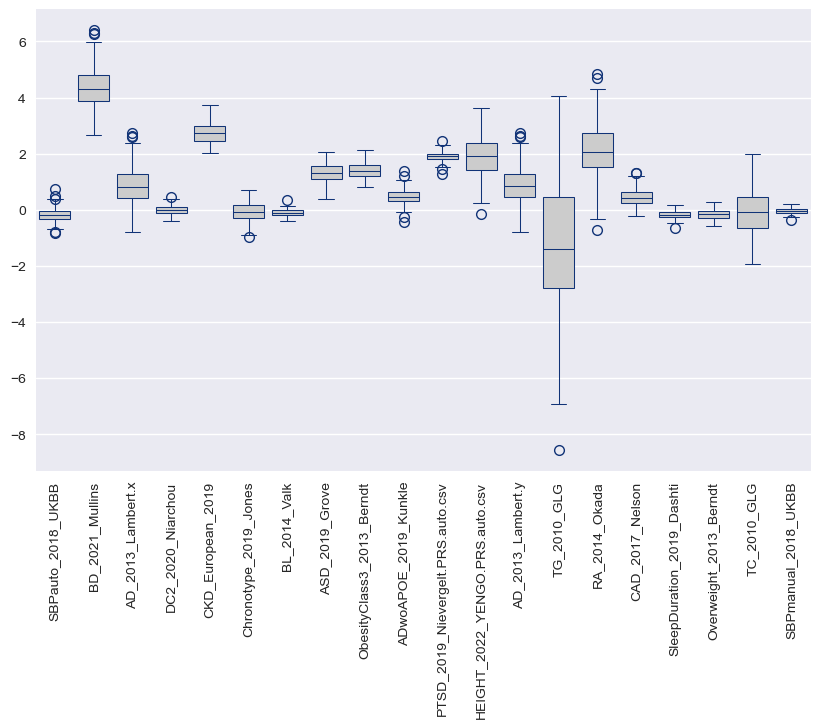

In [12]:
plot_distribution(PSG_filtered, 20)

In [15]:
def plot_variance_histogram(data):
    """
    Plot the histogram of the variances of the data
    :param data: data to be plotted
    """
    plt.figure(figsize=(8,4))
    sns.histplot(
        data.var(), color=".8", edgecolor="#137", linewidth=.75)
    plt.xlabel('Variance')
    plt.ylabel('Frequency')
    plt.title('Histogram of the variances of the PSG data')
    plt.show()

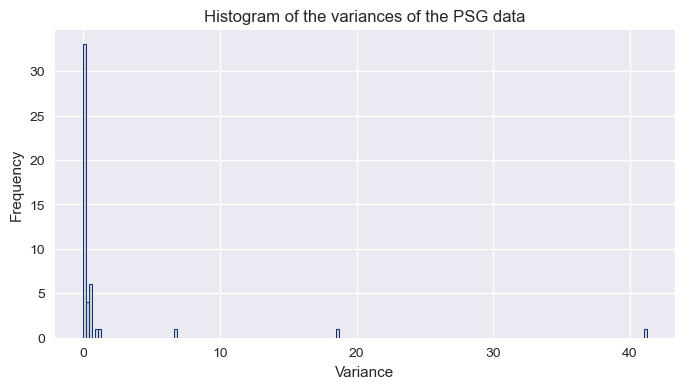

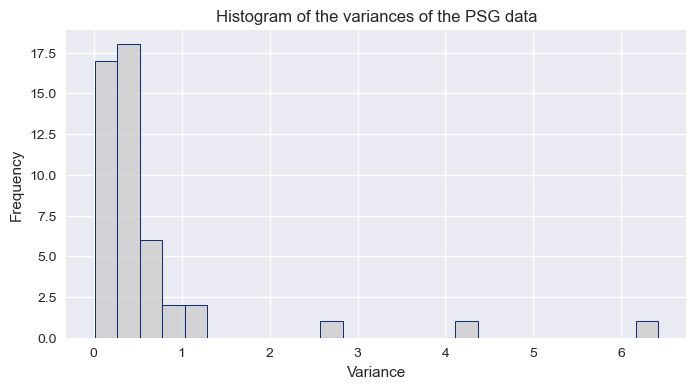

In [16]:
plot_variance_histogram(PSG_filtered)
# Pareto Scaling of the PSG data
PSG_data = PSG_filtered.iloc[:, 1:]
PSG_scaled = pareto_scaling(PSG_data)
plot_variance_histogram(PSG_scaled)

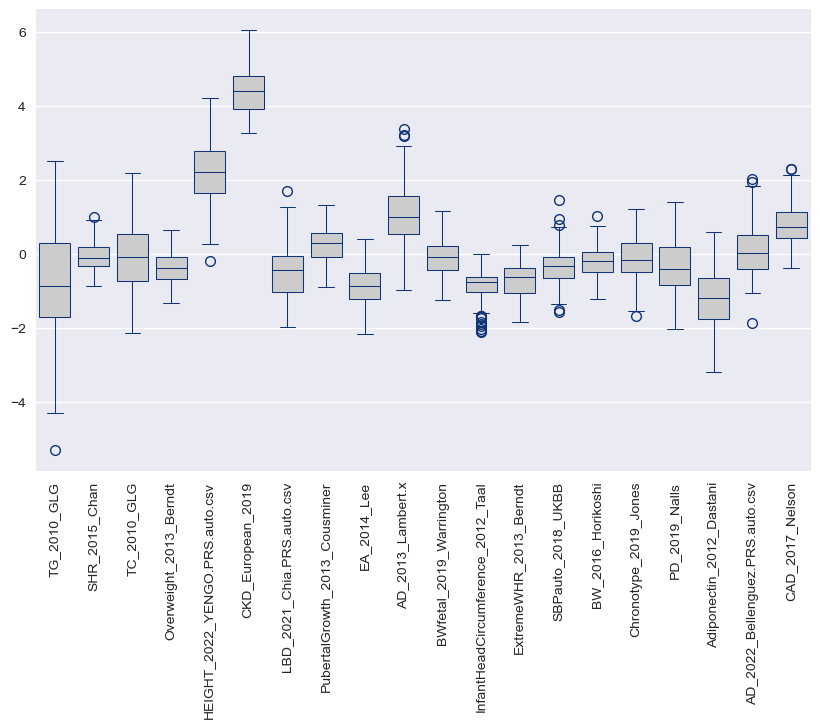

In [17]:
plot_distribution(PSG_scaled, 20)

### Saving the data

In [28]:
# Add the Target column to the PSG data
PSG_filtered['TwoClass'] = metabolomics['TwoClass']
PSG_scaled['TwoClass'] = metabolomics['TwoClass']

In [30]:
# Save the data to the Excel file
with pd.ExcelWriter(path, engine='openpyxl') as writer:
    metabolomics.to_excel(writer, sheet_name='Metabolomics', index=False)
    lipidomics.to_excel(writer, sheet_name='Lipidomics', index=False)
    proteomics.to_excel(writer, sheet_name='Proteomics', index=False)
    pareto_metabolomics.to_excel(writer, sheet_name='Pareto Metabolomics', index=False)
    pareto_proteomics.to_excel(writer, sheet_name='Pareto Proteomics', index=False) 
    PSG_filtered.to_excel(writer, sheet_name='PSG', index=False)
    PSG_scaled.to_excel(writer, sheet_name='Pareto PSG', index=False)